<h2> Calculating Warriors probability of winning the series </h2>

If we assume that the Warriors have the same probability of winning each home game and the same probability of winning each road game, this is an example of two separate binomial distributions. We have to consider all the ways that the Warriors can win the series, given h (home probability) and a (away probability). Then, we sum up the probabilities of each one of these combinations happening. 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [1]:
##these are helper functions. X is the probability of the warriors winning a game, and n is the number of times they win
def win(x,n):
    return x**n
def loss(x,n):
    return (1-x)**n

In [4]:
##this returns the sum of the probabilities of all combos that the warriors can win the series
##h represents the home probability, and a represents the away probability
def probability(h,a):
    total = 0
    #4 games- 2 home win, 2 road win. This is equivalent to a sweep
    total+= win(h,2)*win(a,2)
    
    #5 games - 3 home win,1 road win, 1 road loss, 2 ways that this can happen
    ## either WWLWW or WWWLW
    total+=2*win(h,3)*win(a,1)*loss(a,1)
    
    #5 games- 2 home win, 1 home loss, 2 road win, 2 combos
    ##either WLWWW or LWWWW
    total+=2*win(h,2)*loss(h,1)*win(a,2)
    
    #6 games - 1 road win, 3 home wins, 2 road losses, 1 combo
    #WWLLWW
    total+=win(a,1)*win(h,3)*loss(a,2)
    
    #6 games- 2 road wins, 2 home wins, 1 road loss, 1 home loss, 6 combos
    #WLWLWW, WWWLLW, LWWLWW, WLLWWW, WWLWLW, LWLWWW
    total+=6*win(h,2)*win(a,2)*loss(h,1)*loss(a,1)
    
    #6 games- 3 road wins, 1 home win, 2 home losses, 3 combos
    #LLWWWW,LWWWLW, WLWWLW
    total+=3*win(a,3)*win(h,1)*loss(h,2)
    
    #7 games- 4 home wins, 3 road losses 1 combo
    ##WWLLWLW
    total+=win(h,4)*loss(a,3)
    
    #7 games, 3 home wins, 1 road win,1 home loss,2 road loses, 9 combos
    #WWLLLWW, WWWLLLW, WWLWLLW, WLLLWWW, WLWLWLW, WLLWWLW, LWLLWWW, LWLWWLW, LWWLWLW
    total+=9*win(h,3)*loss(h,1)*win(a,1)*loss(a,2)
    
    #7 games, 2 home wins, 2 road wins, 2 home losses, 1 road loss, 9 combos
    #LLWWWLW, LLWLWWW, LLLWWWW, LWWWLLW, LWWLLWW, LWLWLWW, WLWWLLW, WLWLLWW, WLLWLWW
    total+=9*win(h,2)*loss(h,2)*win(a,2)*loss(a,1)
    
    #7 games 1 home win, 3 home losses, 3 road wins, 1 combo
    #LLWWLWW
    total+=win(h,1)*loss(h,3)*win(a,3)
    
    return total


<h3> Double Checking with Monte Carlo Simulations </h3>

This is not the easiest way to double check my homemade function. However, it is the quickest since I don't want to use a binomial function from a library. So, I can simulate a 7 game series, and from the central limit theorem and the law of large numbers, I can check numerically if my binomial function is written correctly.

In [11]:
def simulation(h,a):
    wins = 0
    probs = [h,h,h,h,a,a,a]
    for i in probs:
        if np.random.rand()<i:
            wins+=1
    return int(wins>=4)

In [20]:
##run the thing 1,000,000 times just for assurance
approx = 0
for i in range(1000000):
    approx+=simulation(.8,.6)
print float(approx)/1000000
print probability(.8,.6)

0.897969
0.898048


Okay I am convinced that it is written correctly! (I double checked with a binomial calculator)

In [30]:
##creates triples of the home win probability, the away win probability, and the overall probability
##of winning the series given these probabilites. I assume a lower bound of 50% for home wins, 40% for road wins,
## and a constraint that the home win probability must be higher than the road win probability
values = []
for i in np.linspace(.5,1,100):##home win
    for k in np.linspace(.4,i,100): ##road win
        nums = [i,k,probability(i,k)]
        values.append(nums)


values = np.array(values)

##changing it to a proper form so that I can graph it.
home_win = []
road_win = []
probs = []
for i in values:
    home_win.append(i[0])
    road_win.append(i[1])
    probs.append(i[2])

In [31]:
df.head()

,home_win_percent,road_win_percent,series_win_percent
0,0.5,0.40000,0.406500
1,0.5,0.40101,0.407439
2,0.5,0.40202,0.408379
3,0.5,0.40303,0.409319
4,0.5,0.40404,0.410259


In [36]:
df = pd.DataFrame()

df['home_win_percent'] = home_win

df['road_win_percent'] = road_win
df['series_win_percent'] = probs



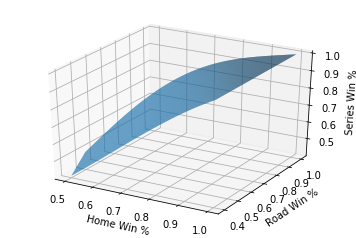

In [44]:
##This looks at the series win percentage, as we vary the home win percentage and road win percentage

fig= plt.figure()
X=df['home_win_percent']
Y = df['road_win_percent']
Z = df['series_win_percent']
ax = fig.gca(projection='3d')
Axes3D.plot_trisurf(ax,X,Y,Z,linewidth=.1)
ax.set_xlabel('Home Win %')
ax.set_ylabel('Road Win %')
ax.set_zlabel('Series Win %')

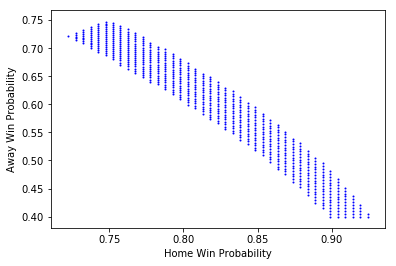

In [40]:
## Here, I look at a cross section, where we constrain the series win probability between the two models provided
## by FiveThirtyEight and ESPN's BPI
subdf = df[(df['series_win_percent']>.9) & (df['series_win_percent']<.93)]

subdf.shape

figure = plt.figure()
plt.scatter(subdf['home_win_percent'],subdf['road_win_percent'], c='b', s=1)
plt.xlabel('Home Win Probability')
plt.ylabel('Away Win Probability')